## <center> Building ANN </center>

#### task is to build cat vs non cat classifier with ANN from scratch 

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data=h5py.File('train_catvnoncat.h5','r')
test_data=h5py.File('test_catvnoncat.h5','r')
train_set_x=np.array(train_data.get('train_set_x'))
train_set_y=np.array(train_data.get('train_set_y'))
test_set_x=np.array(test_data.get('test_set_x'))
test_set_y=np.array(test_data.get('test_set_y'))

0


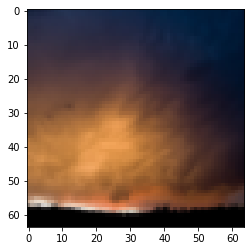

In [3]:
plt.imshow(train_set_x[0])
print(train_set_y[0])

1


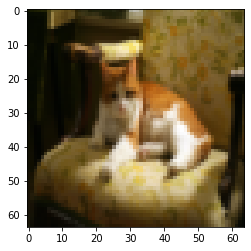

In [4]:
plt.imshow(train_set_x[7])
print(train_set_y[7])

### Training Data set shape

In [5]:
train_x_set=train_set_x.reshape(train_set_x.shape[0],train_set_x.shape[1]*train_set_x.shape[2]*train_set_x.shape[3]).T
train_y_set=train_set_y.reshape(1,train_set_y.shape[0])

In [6]:
print(train_x_set.shape)
print(train_y_set.shape)

(12288, 209)
(1, 209)


In [7]:
test_x_set=test_set_x.reshape(test_set_x.shape[0],test_set_x.shape[1]*test_set_x.shape[2]*test_set_x.shape[3]).T/255
test_y_set=test_set_y.reshape(1,test_set_y.shape[0])

In [8]:
print(test_x_set.shape)
print(test_y_set.shape)

(12288, 50)
(1, 50)


###  Initializing Weights <br>
W is initialized with random values (n[ l ],n[ l-1 ])<br>
b is initialized with random or zero (n[l],1) <br>
where n[ l ]  is number units in l th layer

In [9]:
def initilize_weights(n_layers):
    """"n_layers :- list of integer which specifies number of units in 0,1,2,......L layers
                    L is last layer"""
    parameters={}
    for l in range(1,len(n_layers)):
        parameters['W'+str(l)]=np.random.randn(n_layers[l],n_layers[l-1])*0.01
        parameters['b'+str(l)]=np.random.rand(n_layers[l],1)
    return(parameters)

In [10]:
para=initilize_weights([4,3,2,1])
print(para['W1'].shape)
print(para['b1'].shape)
print(para['W2'].shape)
print(para['b2'].shape)
print(para['W3'].shape)
print(para['b3'].shape)

(3, 4)
(3, 1)
(2, 3)
(2, 1)
(1, 2)
(1, 1)


In [11]:
print(para)

{'W1': array([[-0.00223274, -0.00367381, -0.01073751, -0.00153323],
       [-0.00339456, -0.00756228, -0.01600221,  0.00533804],
       [ 0.0039478 ,  0.01716645,  0.00634247,  0.01148151]]), 'b1': array([[0.71963598],
       [0.95927502],
       [0.45944401]]), 'W2': array([[ 0.00498087, -0.00298408, -0.02958533],
       [-0.03355781, -0.01018635,  0.00339494]]), 'b2': array([[0.06250435],
       [0.82122544]]), 'W3': array([[0.00428276, 0.02789648]]), 'b3': array([[0.77635538]])}


### Forward Propogation

In [12]:
def tanh(z):
    return(np.tanh(z))

In [13]:
def relu(z):
    return(np.where(z>0,z,0))

In [14]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [15]:
def activation_prop(z,activation):
    if activation=='tanh':
        return(tanh(z))
    elif activation=='relu':
        return(relu(z))
    elif activation=='sigmoid':
        return(sigmoid(z))
    else:
        raise("using activation function tanh,relu,sigmoid")

In [16]:
def forward_prop(X,layers,parameters):
    """layers :- it is a list of tuple (units,activation) """
    cache={}
    L= len(layers)
    A_prev=X
    cache['A0']=A_prev
    for l in range(1,L+1):
        z=np.dot(parameters['W'+str(l)],A_prev)+parameters['b'+str(l)]
        A_prev=activation_prop(z,layers[l-1][1])
        cache['Z'+str(l)]=z
        cache['A'+str(l)]=A_prev
    return(A_prev,cache)

In [17]:
X=train_x_set[:,1].reshape(-1,1)/255
layers=[(3,'relu'),(2,'relu'),(1,'sigmoid')]
parameters=initilize_weights([12288,3,2,1])
a,cache=forward_prop(X,layers,parameters)
print(a)
print(cache)

[[0.50087729]]
{'A0': array([[0.76862745],
       [0.75294118],
       [0.74509804],
       ...,
       [0.32156863],
       [0.31372549],
       [0.31764706]]), 'Z1': array([[0.49325584],
       [1.21109371],
       [0.39066226]]), 'A1': array([[0.49325584],
       [1.21109371],
       [0.39066226]]), 'Z2': array([[0.62018986],
       [0.68122327]]), 'A2': array([[0.62018986],
       [0.68122327]]), 'Z3': array([[0.00350915]]), 'A3': array([[0.50087729]])}


### Back Propogation 

In [18]:
def grad_sigmoid(z):
    a=sigmoid(z)
    return(a-a**2)

In [19]:
def grad_tanh(z):
    a=tanh(z)
    return(1-a**2)

In [20]:
def grad_relu(z):
    return(np.where(z>0,1,0))

In [21]:
def back_activation(z,activation):
    if activation=='tanh':
        return(grad_tanh(z))
    elif activation=='relu':
        return(grad_relu(z))
    elif activation=='sigmoid':
        return(grad_sigmoid(z))
    else:
        raise("using activation function tanh,relu,sigmoid")

In [22]:
def back_prop(y,A,cache,layers,parameters,learning_rate):
    m=len(y)
    dA= -(np.divide(y, A) - np.divide(1 - y ,1 - A))
    L=len(layers)
    grad={}
    for l in reversed(range(1,L+1)):
        dz=np.multiply(dA,back_activation(cache['Z'+str(l)],layers[l-1][1]))
        dw=np.dot(dz,cache['A'+str(l-1)].T)
        db=np.sum(dz,axis=1,keepdims=True)
        dA=np.dot(parameters['W'+str(l)].T,dz)
        grad['dW'+str(l)]=dw
        grad['db'+str(l)]=db
    for l in range(1,L):
        parameters['W'+str(l)]=parameters['W'+str(l)]-(1/m)*learning_rate*grad['dW'+str(l)]
        parameters['b'+str(l)]=parameters['b'+str(l)]-(1/m)*learning_rate*grad['db'+str(l)]
    return(parameters)

### Computing cost

In [23]:
def compute_cost(y_hat,y):
    """ y_hat :- result of output node
        y  :- true y values """
    m=len(y)
    
    cost=(-1/m)*(y*np.log(y_hat)+(1-y)*np.log(1-y_hat)).sum()
    return(cost)

In [24]:
compute_cost(np.array([0.023,0.964,0.65,0.98,0.54,0.76]),np.array([0.34,0.087,0.76,0.65,0.56,0.023]))

1.3975295618155377

### Lets Build model <br>
put all function together

In [25]:
def ANN(x_train,y_train,layers,validation_data=None,epochs=1,num_iteration=1000,learning_rate=0.001,verbose=0):
    """" x_train :- shape should be (nx,nm)
         layers :- list of tuple (units,activation)"""
    assert(len(x_train.shape)==2)
    
    if validation_data != None:
        assert(len(validation_data[0].shape)==2)
    
    n_layers=[]
    n_layers.append(x_train.shape[0])
    for unit in layers:
        n_layers.append(unit[0])
        
    parameters=initilize_weights(n_layers)
    
    costs=[]
    val_costs=[]
    for epoch in range(epochs):
        print('{} epoch is starting => => => :-'.format(epoch+1) )
        for i in range(1,num_iteration+1):
            #farward propogation
            A,cache=forward_prop(x_train,layers,parameters)
            #computing cost
            cost=compute_cost(A,y_train)
            # computing validation loss
            if validation_data is not None:
                y_val,_=forward_prop(validation_data[0],layers,parameters)
                val_cost=compute_cost(y_val,validation_data[1])
            
            # back propogation
            parameters=back_prop(y_train, A, cache, layers, parameters, learning_rate)
        
            if validation_data is not None:
                if verbose==1 and  i % 100 == 0:
                    val_costs.append(val_cost)
                    costs.append(cost)
                    print("\t{}--> train_loss= {} ,val_loss = {}".format(i,cost,val_cost))
            if validation_data==None and verbose==1 and  i % 100 == 0:
                val_costs.append(val_cost)
                costs.append(cost)
                print("\t{}--> train_loss= {}".format(i,cost))
    if validation_data is not None:
        history={"parameters":parameters,"loss":costs,"val_loss":val_costs,'layers':layers}
    else:
        history={"parameters":parameters,"loss":costs,'layers':layers}
    return(history)

### Data Processing

In [26]:
X_train=train_x_set.astype(float)/255

In [27]:
X_train.max()

1.0

In [28]:
y_train=train_y_set
val_data=(test_x_set,test_y_set)

### Training Model

In [29]:
history=ANN(X_train,y_train,[(512,'tanh'),(100,'tanh'),(1,'sigmoid')],validation_data=val_data,epochs=3,num_iteration=1000,learning_rate=0.01, verbose=1)

1 epoch is starting => => => :-
	100--> train_loss= 134.91191560236786 ,val_loss = 40.58097816285893
	200--> train_loss= 134.89881991026954 ,val_loss = 40.591618670767886
	300--> train_loss= 134.88006731475605 ,val_loss = 40.59094648848868
	400--> train_loss= 134.70047756583452 ,val_loss = 40.528363753666895
	500--> train_loss= 125.07621410936726 ,val_loss = 32.98870133566822
	600--> train_loss= 134.6164734402939 ,val_loss = 40.610074334612456
	700--> train_loss= 133.51009463649942 ,val_loss = 40.55258729146428
	800--> train_loss= 123.34445564446176 ,val_loss = 28.819513164640604
	900--> train_loss= 133.27862949997137 ,val_loss = 40.56540621018131
	1000--> train_loss= 113.90674133038917 ,val_loss = 29.30492849885109
2 epoch is starting => => => :-
	100--> train_loss= 114.0400787612561 ,val_loss = 34.35059205591585
	200--> train_loss= 123.60183927581991 ,val_loss = 39.74095370996277
	300--> train_loss= 101.30691310382645 ,val_loss = 25.679910034040986
	400--> train_loss= 91.799142945555

In [30]:
loss_df=pd.DataFrame({'train_loss':history['loss'],'val_loss':history["val_loss"]})

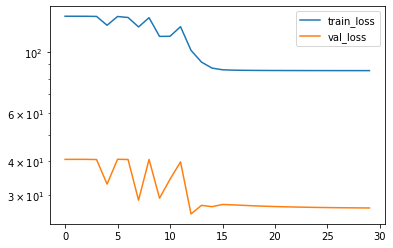

In [42]:
loss_df.plot(logy=True)

In [32]:
def prediction(parameter,X,layers):
    A,_=forward_prop(X,layers,parameter)
    y=np.where(A>0.5,1,0)
    return(y)

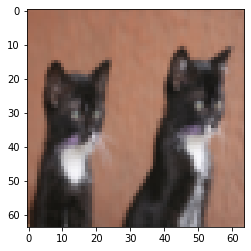

In [33]:
test_point=test_x_set[:,0]
plt.imshow(test_set_x[0])

In [34]:
prediction(history['parameters'],test_point.reshape(12288,1),history['layers'])

array([[1]])

## Evaluating Model

In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
test_y_set

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]], dtype=int64)

In [37]:
pred=prediction(history['parameters'],val_data[0],history['layers'])

In [38]:
pred

array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 0, 0]])

In [39]:
print("Accuracy_Score=",accuracy_score(test_y_set.reshape(50),pred.reshape(50)))

Accuracy_Score= 0.72


In [40]:
print(classification_report(test_y_set.reshape(50),pred.reshape(50)))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61        17
           1       0.81      0.76      0.78        33

    accuracy                           0.72        50
   macro avg       0.69      0.70      0.70        50
weighted avg       0.73      0.72      0.72        50



In [41]:
print(confusion_matrix(test_y_set.reshape(50),pred.reshape(50)))

[[11  6]
 [ 8 25]]
